In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# Replace with your actual file path
df = pd.read_csv("C:\\Users\\rawat\\Desktop\\Sample - Superstore.csv", encoding='ISO-8859-1')


# Show first 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Column names and data types
df.info()

# Statistical summary
df.describe()


Dataset shape: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-nu

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Assume 'Order Date' aur 'Ship Date' columns hain
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Ab check karte hain type
print(df['Order Date'].dtype)
print(df['Ship Date'].dtype)


datetime64[ns]
datetime64[ns]


In [6]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day


In [7]:
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Year       0
Order Month      0
Order Day        0
dtype: int64


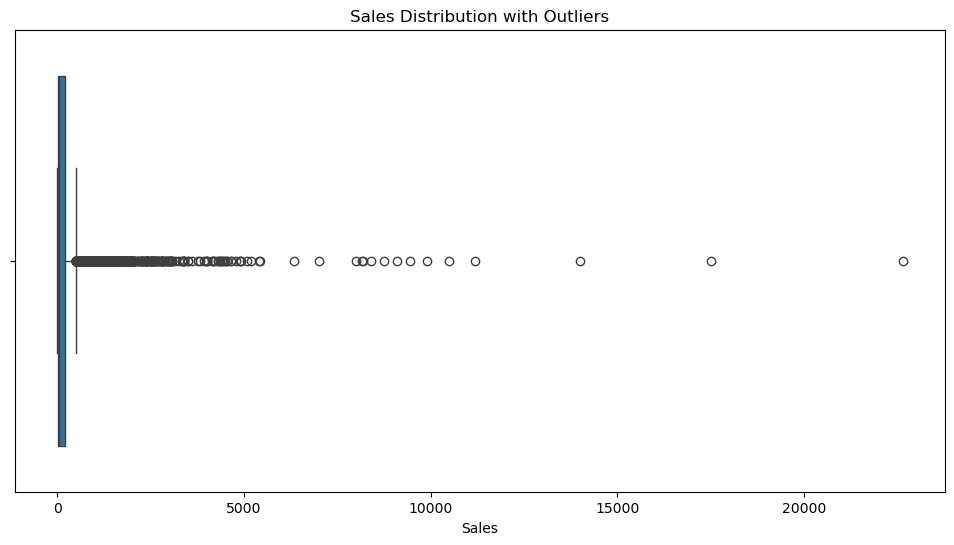

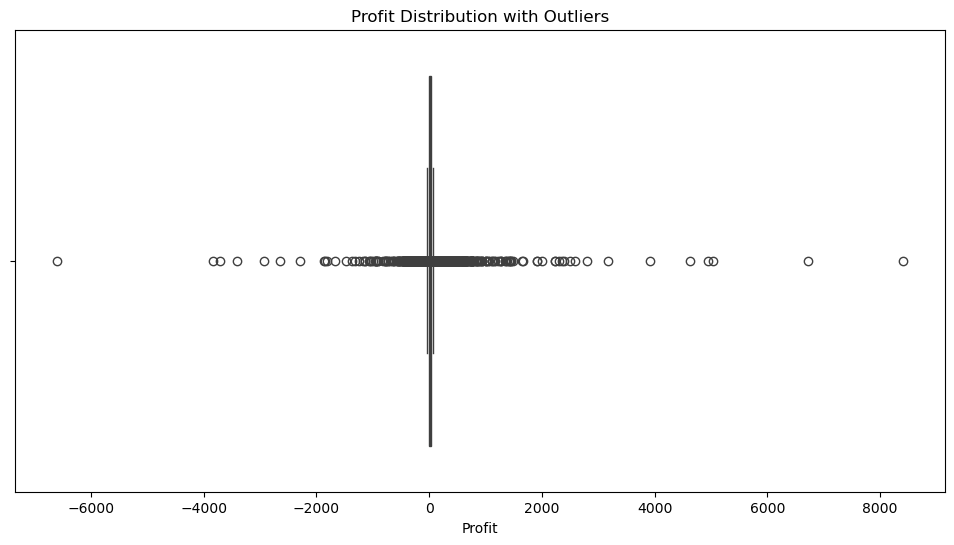

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Sales'])
plt.title("Sales Distribution with Outliers")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Profit'])
plt.title("Profit Distribution with Outliers")
plt.show()


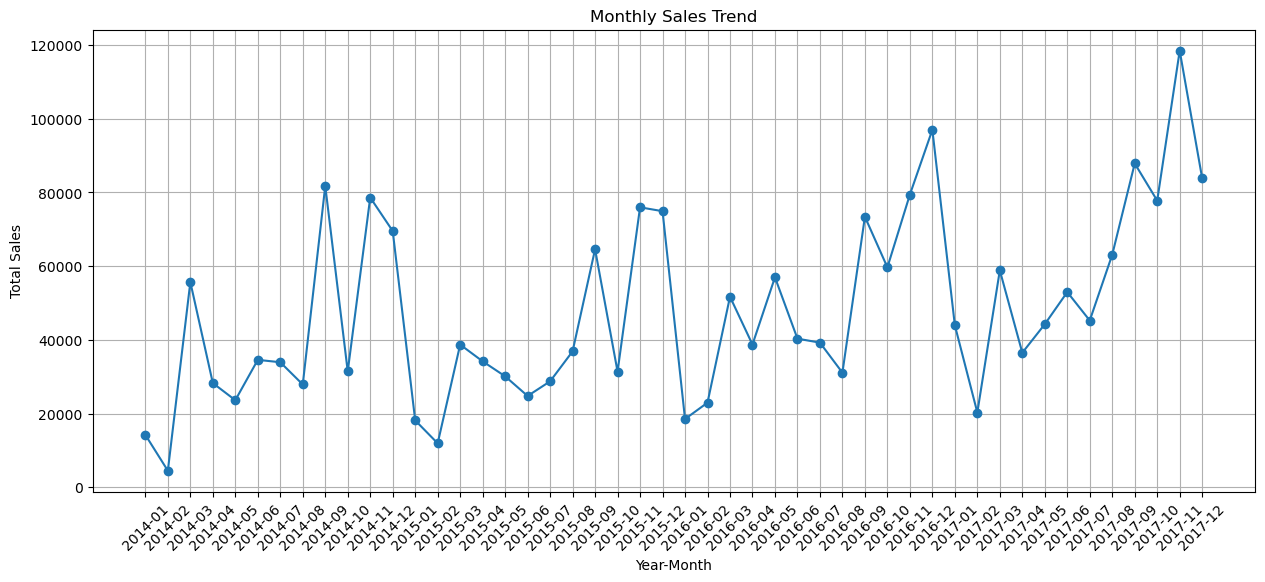

In [9]:
# Group by Year and Month, sum of Sales
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Create a 'Year-Month' column for plotting
monthly_sales['Year-Month'] = monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str).str.zfill(2)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [10]:
category_summary = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

print(category_summary)


          Category        Sales       Profit
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008
2       Technology  836154.0330  145454.9481


In [11]:
import plotly.express as px

fig = px.bar(category_summary, x='Category', y=['Sales', 'Profit'], barmode='group', title='Sales and Profit by Category')
fig.show()


In [12]:
subcat_summary = df.groupby('Sub-Category').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

fig2 = px.bar(subcat_summary, x='Sub-Category', y=['Sales', 'Profit'], barmode='group', title='Sales and Profit by Sub-Category')
fig2.show()


In [15]:
segment_profit = df.groupby('Segment').agg({'Profit':'sum'}).reset_index()
print(segment_profit)


       Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60298.6785


In [14]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Order Day'],
      dtype='object')


In [16]:
import plotly.express as px

fig = px.pie(segment_profit, names='Segment', values='Profit', title='Profit Contribution by Segment')
fig.show()


In [17]:
# Ratio = Profit / Sales
df['Sales_to_Profit_Ratio'] = df['Profit'] / df['Sales']

# Ab Category wise average ratio dekhte hain
category_ratio = df.groupby('Category')['Sales_to_Profit_Ratio'].mean().reset_index()

print(category_ratio)


          Category  Sales_to_Profit_Ratio
0        Furniture               0.038784
1  Office Supplies               0.138030
2       Technology               0.156138


In [18]:
import plotly.express as px

fig = px.bar(category_ratio, x='Category', y='Sales_to_Profit_Ratio',
             title='Average Sales-to-Profit Ratio by Category',
             color='Sales_to_Profit_Ratio', text='Sales_to_Profit_Ratio')
fig.show()
